# Hunting Down Robots for an Online Bidding Auction

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [ ]:


df = pd.read_csv('bids.csv', encoding= 'unicode_escape')



In [ ]:
# Print first few records
df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [ ]:

df.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


## Exploratory Data Analysis

In [ ]:

train = pd.read_csv('train[1].csv', encoding= 'unicode_escape')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [ ]:
train.isnull().sum()


bidder_id          0
payment_account    0
address            0
outcome            0
dtype: int64

In [ ]:
df['country'].unique()

array(['us', 'in', 'py', 'ru', 'th', 'id', 'za', 'ng', 'sd', 'au', 'hr',
       'np', 'iq', 'bd', 'tr', 'ch', 'ke', 'uk', 'fr', 'pk', 'my', 'vn',
       'ro', 'gh', 'ua', 'pl', 'by', 'ar', 'zm', 'lk', 'ph', 'br', 'es',
       'mx', 'il', 'qa', 'nl', 've', 'sg', 'gt', 'ae', 'az', 'uz', 'ht',
       'tz', 'gm', 'dk', 'no', 'kw', 'mk', 'hu', 'it', 'ml', 'sv', 'bn',
       'ni', 'cn', 'et', 'ge', 'mw', 'ee', 'ye', 'kr', 'tn', 'gr', 'at',
       'cm', 'ca', 'mn', 'rs', 'sz', 'pe', 'jp', 'sl', 'bh', 'zw', 'bg',
       'de', 'eu', 'cr', 'jo', 'ie', 'sa', 'eg', 'dz', 'hk', 'ec', 'si',
       'lv', 'na', nan, 'mt', 'ug', 'kg', 'se', 'bb', 'sc', 'sn', 'om',
       'fi', 'cl', 'ma', 'am', 'lr', 'be', 'bf', 'kh', 'md', 'ly', 'al',
       'ba', 'bo', 'lt', 'ga', 'mr', 'jm', 'bj', 'mu', 'pa', 'cz', 'ao',
       'lu', 'me', 'af', 'kz', 'hn', 'ls', 'uy', 'lb', 'cy', 'sk', 'ir',
       'la', 'dj', 'bz', 'ci', 'is', 'mg', 'so', 'co', 'pt', 'gy', 'td',
       'rw', 'pr', 'bw', 'gq', 'cv', 'mc', 'ne', 'tg

In [ ]:
df['merchandise'].unique()

array(['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods',
       'office equipment', 'computers', 'books and music', 'clothing',
       'auto parts'], dtype=object)

In [ ]:
pos = 0
neg = 0
for val in train['outcome']:
    if val == 0:
        neg+=1
    elif val == 1:
        pos+=1
print("outcome count of 0: ",neg)
print("outcome count of 1: ",pos)
d2={'pos':pos,'neg':neg}

outcome count of 0:  1910
outcome count of 1:  103


dict_keys(['jewelry', 'furniture', 'home goods', 'mobile', 'sporting goods', 'office equipment', 'computers', 'books and music', 'clothing', 'auto parts'])


Text(0.5, 1.0, 'number of bids for each item')

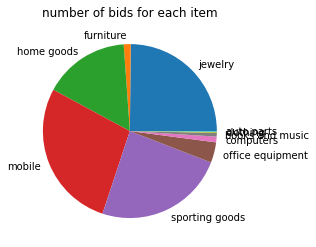

In [ ]:
# Pie plot for product wise number of bids
dic = {}
for val in df['merchandise'].unique():
    dic[val]=0
for ch in df['merchandise']:
    dic[ch]+=1
value = dic.values()
name = dic.keys()
print(name)

plt.pie(value,labels=name)
plt.title("number of bids for each item")

([<matplotlib.axis.XTick at 0x1e5c7f231f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

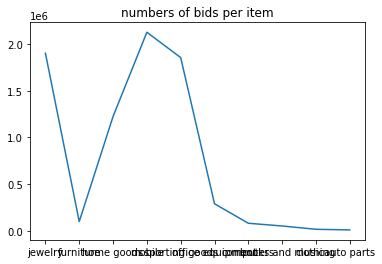

In [ ]:

plt.plot(name,value)
plt.title("numbers of bids per item")

plt.xticks(range(10))


Text(0.5, 1.0, 'positive vs negative outcomes by human bidders')

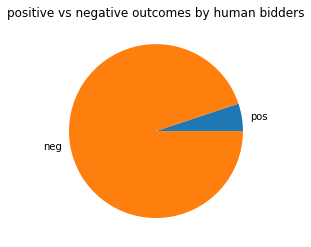

In [ ]:
plt.pie(d2.values(),labels=d2.keys())
plt.title("positive vs negative outcomes by human bidders")

In [ ]:
arr2 = df['device']

In [ ]:
d3={}
for item in arr2:
    d3[item]=0
for val in arr2:
    d3[val]+=1

[print(key,":",value) for (key, value) in sorted(d3.items(),key=lambda x:x[1])]




phone688 : 1
phone1116 : 1
phone1143 : 1
phone1162 : 1
phone1231 : 1
phone1258 : 1
phone1324 : 1
phone1437 : 1
phone1649 : 1
phone1838 : 1
phone1918 : 1
phone1955 : 1
phone1975 : 1
phone2046 : 1
phone2049 : 1
phone2097 : 1
phone2177 : 1
phone2235 : 1
phone2402 : 1
phone2451 : 1
phone2498 : 1
phone2520 : 1
phone2547 : 1
phone2580 : 1
phone2591 : 1
phone2597 : 1
phone2606 : 1
phone2658 : 1
phone2666 : 1
phone2667 : 1
phone2694 : 1
phone2696 : 1
phone2705 : 1
phone2715 : 1
phone2725 : 1
phone2767 : 1
phone2776 : 1
phone2779 : 1
phone2781 : 1
phone2802 : 1
phone2807 : 1
phone2838 : 1
phone2890 : 1
phone2897 : 1
phone2907 : 1
phone2910 : 1
phone2924 : 1
phone2928 : 1
phone2969 : 1
phone2983 : 1
phone3013 : 1
phone3046 : 1
phone3048 : 1
phone3058 : 1
phone3078 : 1
phone3096 : 1
phone3149 : 1
phone3177 : 1
phone3222 : 1
phone3230 : 1
phone3232 : 1
phone3252 : 1
phone3278 : 1
phone3299 : 1
phone3334 : 1
phone3339 : 1
phone3387 : 1
phone3389 : 1
phone3391 : 1
phone3411 : 1
phone3420 : 1
phone34

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
d4={}
lst = d3.values()
for i in lst:
    if i not in d4:
        d4[i]=0

print()
for j in lst:
    d4[j]+=1
print(d4)



{34287: 1, 22591: 1, 171584: 1, 706573: 1, 78439: 1, 11248: 1, 71543: 1, 2108: 1, 811: 1, 39129: 1, 1476: 1, 53800: 1, 35611: 1, 153202: 1, 32841: 1, 114389: 1, 2: 650, 8473: 1, 80247: 1, 26206: 1, 29284: 1, 12399: 1, 126426: 1, 79838: 1, 2280: 1, 100741: 1, 393: 5, 36734: 1, 7192: 1, 67430: 1, 10146: 1, 165230: 1, 50234: 1, 16109: 1, 39590: 1, 1070: 2, 1329: 1, 700: 2, 148388: 1, 121215: 1, 34725: 1, 10731: 1, 38911: 1, 42405: 1, 196: 5, 10625: 1, 43395: 1, 17344: 1, 8801: 1, 73521: 1, 11220: 1, 70738: 1, 100677: 1, 13171: 1, 41325: 1, 70070: 1, 4783: 2, 153855: 1, 63: 16, 34696: 1, 1869: 2, 2923: 1, 12749: 1, 29279: 1, 3033: 1, 8648: 1, 20397: 1, 72683: 1, 22438: 1, 3673: 1, 25947: 1, 50342: 1, 1248: 1, 74307: 1, 23573: 1, 2997: 1, 1171: 1, 227: 7, 14113: 1, 1384: 1, 8: 138, 21837: 1, 38395: 1, 11931: 1, 18487: 1, 30243: 1, 2746: 1, 5468: 1, 33631: 1, 23047: 1, 32977: 1, 24134: 1, 206: 4, 152048: 1, 6902: 1, 2656: 1, 143: 7, 5465: 1, 50355: 1, 7487: 1, 14428: 1, 23352: 1, 9255: 1, 9

{1: 7227981, 650: 2, 5: 3287, 2: 98934, 16: 167, 7: 1462, 138: 8, 4: 10129, 3: 21821, 6: 1637, 8: 1085, 9: 936, 11: 71, 23: 69, 104: 12, 36: 22, 10: 505, 12: 197, 71: 14, 21: 46, 57: 18, 18: 135, 22: 189, 19: 66, 24: 34, 32: 33, 105: 11, 212: 5, 15: 164, 17: 93, 1396: 1, 14: 273, 430: 3, 13: 364, 50: 24, 20: 39, 274: 4, 26: 37, 58: 20, 64: 32, 106: 9, 46: 21, 37: 25, 49: 16, 30: 47, 34: 26, 25: 30, 40: 27, 114: 10, 41: 19, 28: 70, 170: 6, 160: 7, 66: 13, 27: 31, 48: 23}


Text(0.5, 1.0, 'number of bidders(xaxis) vs number of bids(yaxis)')

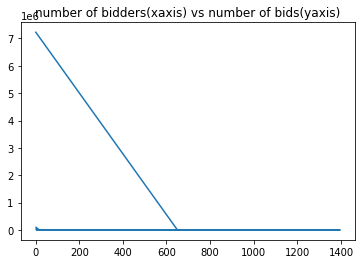

In [ ]:
res = []
[res.append(x) for x in d4.values() if x not in res]
d5 = {}
for value in res:
    d5[value]=0
for i in res:
    sub=0
    for j in d4.keys():
        if d4[j]==i:
            sub+=j
    d5[i]=sub
print(d5)
plt.plot(d5.keys(),d5.values())
plt.title("number of bidders(xaxis) vs number of bids(yaxis)")